# Impossible "MU" Puzzle from Hofstadter's *Gödel, Escher, Bach* (1979)

In his 1979 book, Douglas Hofstadter presents a simple string rewriting system in which the reader is invited solve a puzzle using only four rules. The puzzle is impossible to solve with the rules given. The basic point is that given an axiom (a starting string) and some rules of inference (the string rewriting rules), some strings can never be arrived at. It's gently alluding to Gödel's first incompleteness theorem which states (loosely..!) that for any consistent formal system with rules of inference, there are statements inside the system that can never be proved using those rules of inference.

Nonetheless, as a brief Christmas holiday project, I was interested in exploring the kinds of results that could be arrived at in the MU puzzle; the "coverage" (what proportion of all possible strings are accessible via the rules); the sensitivity of the accessible results to the choice of axiom, etc. The rationalisation in terms of simple arithmetic is shown on the wikipedia page [here.](https://en.wikipedia.org/wiki/MU_puzzle)

The code in the module *mupuzzle.py* should be easily generalisable to describe general formal string-rewriting systems.

## The MU puzzle

As stated in the book, the puzzle goes as follows:

Starting with the string 'MI' (the axiom), try to arrive at the string 'MU' using only the following four rules:

RULES:
1.  xI ---> xIU   (for a string ending in 'I', you can add 'U')
2.  Mx ---> Mxx   (for any string {the whole string, not substrings} that looks like 'M(something)', you can change it to 'M(something)(something)')
3.  xIIIy ---> xUy   (for any instance of 'III', you can replace it with a 'U') 
4.  xUUy ---> xy   (for any instance of 'UU', you can drop it)

examples:

- 'MIIIIU' ---> 'MIUU' using rule 3 at index 2
- 'MUI' ---> 'MUIUI' using rule 2


### Brief exploration of the MU puzzle with a couple of axioms

#### With 'MI' axiom:

In [1]:
from mupuzzle import muPuzzle

In [2]:
# create an example instance of the MU puzzle with the axiom being the main instance variable
example = muPuzzle(axiom='MI')

In [3]:
# The one instance variable is the axiom of the system, defined by the initial starting string
example.axiom

'MI'

In [4]:
# rule one can be applied to the axiom 'MI' because it ends in 'I'
example.rule_one_possible(example.axiom)

True

In [5]:
# rule three can be not applied to the axiom 'MI' because it does not contain 'III'
example.rule_three_possible(example.axiom)

False

In [6]:
# The available options starting with the axiom 'MI' are obtained using get_options()
example.get_options(example.axiom)

{'MIU': '1', 'MII': '2'}

In [7]:
example.get_options

<bound method muPuzzle.get_options of <mupuzzle.muPuzzle object at 0x7f0c0b488580>>

In [8]:
example.apply_rule_one(example.axiom)

'MIU'

In [9]:
example.random_walk(2)

{'rules': [None, '2', '2'], 'strings': ['MI', 'MII', 'MIIII']}

In [12]:
network = example.discover_local_network(num_steps=5)

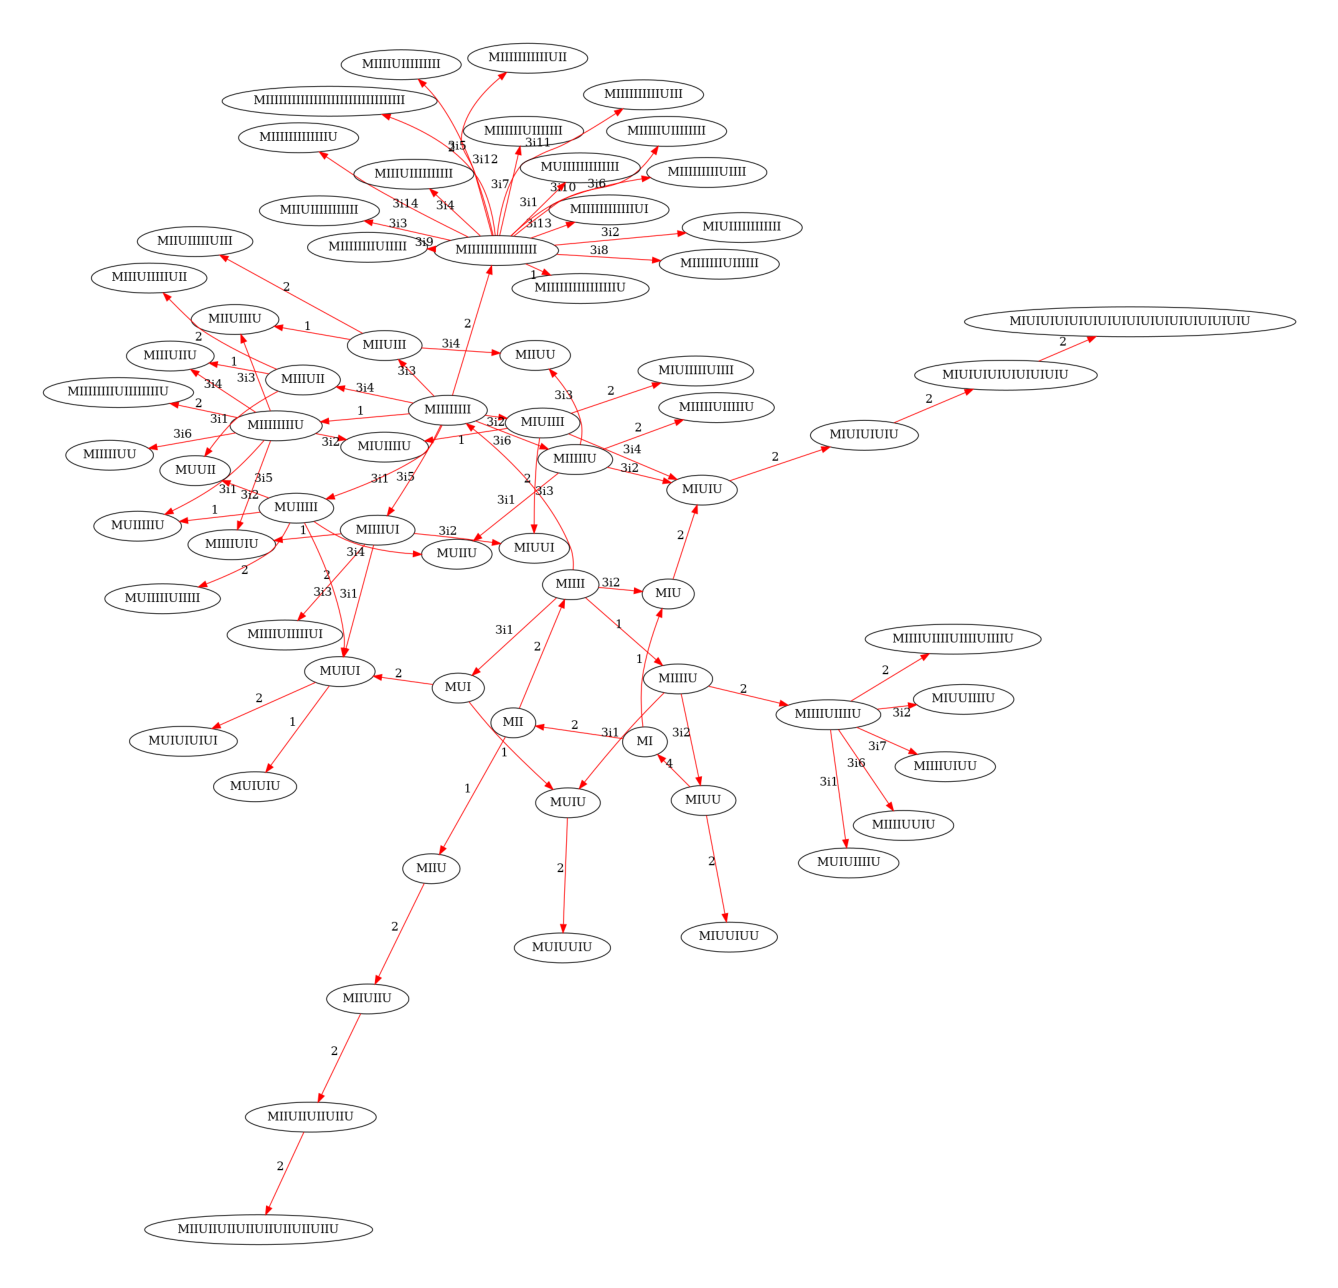

In [11]:
example.plot_network(network)